Importing required libraries and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose as season
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
!pip install pmdarima
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima

In [3]:
data=pd.read_csv('Walmart DataSet.csv')

We are provided with the weekly sales data for their various outlets. Using statistical
analysis, EDA, outlier analysis, and handling the missing values to come up with various
insights.

In [4]:
data.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [5]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
data.shape

(6435, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [9]:
data.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [10]:
col_names=data.columns

## Outlier Analysis

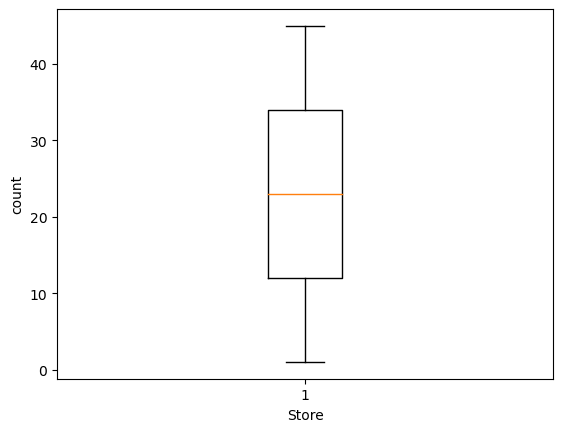

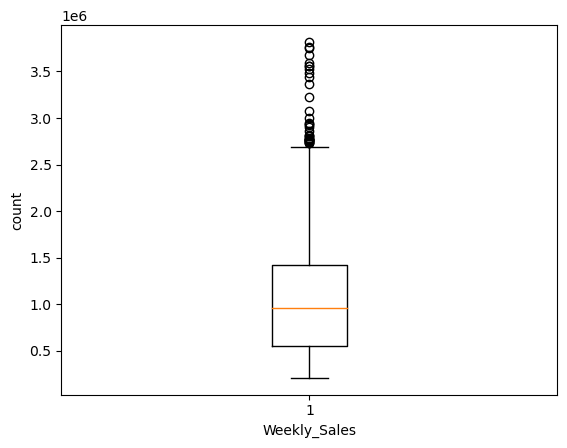

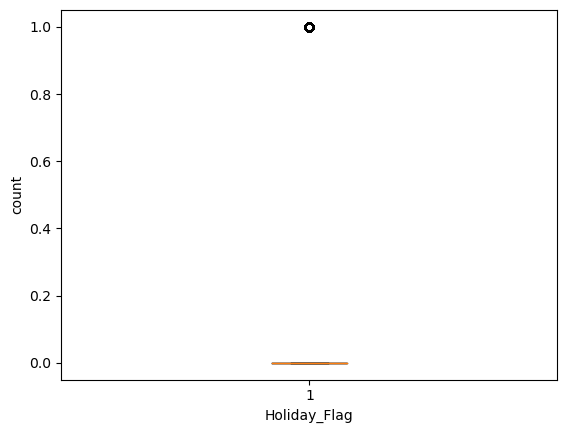

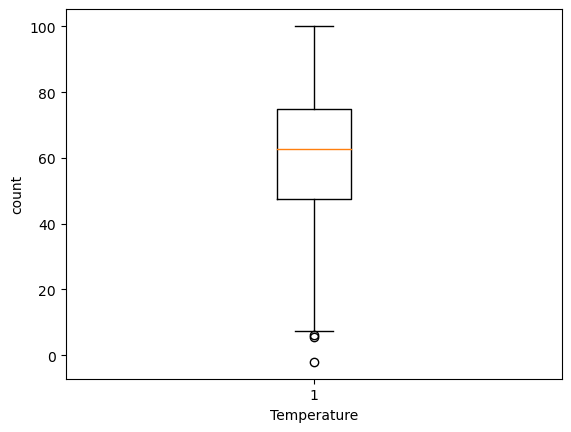

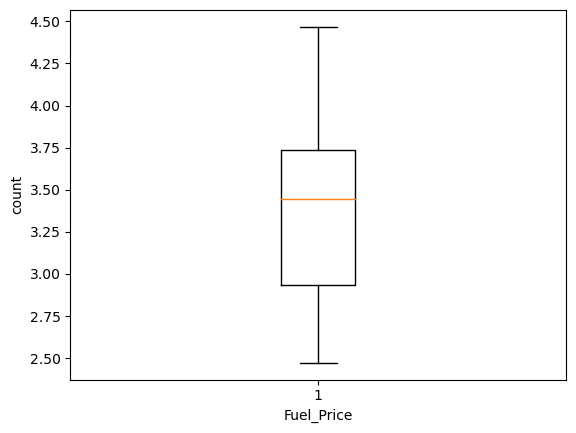

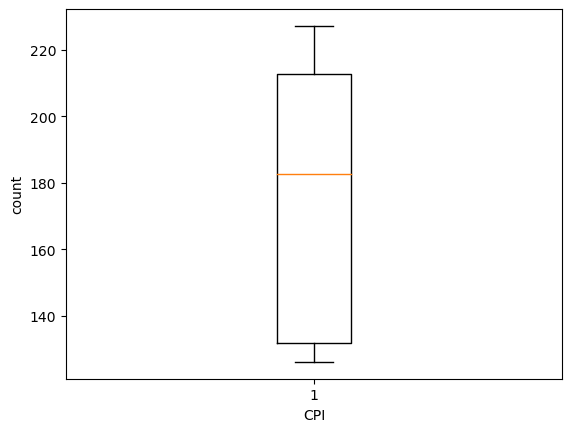

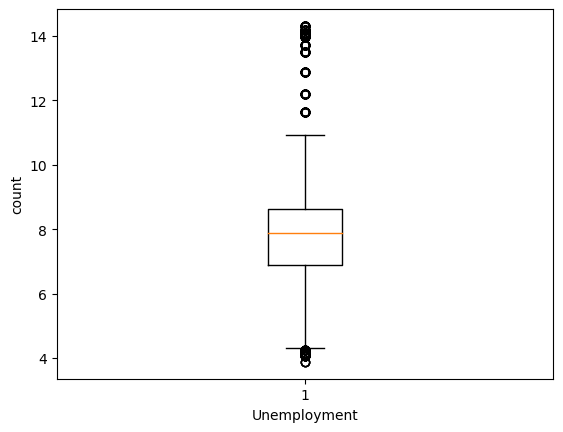

In [11]:
for j in col_names:
    if data[j].dtype!="object":
        plt.boxplot(data[j])
        plt.xlabel(j)
        plt.ylabel('count')
        plt.show()

In [12]:
col_list=["Weekly_Sales","Unemployment","Temperature"]

In [13]:
for i in col_list:
    Q1=data[i].quantile(0.25)
    Q2=data[i].quantile(0.50)
    Q3=data[i].quantile(0.75)
    IQR=Q3-Q1
    lower_range =Q1-1.5*IQR
    upper_range =Q3+1.5*IQR
    data = data[(data[i]>=lower_range) & (data[i]<=upper_range)]

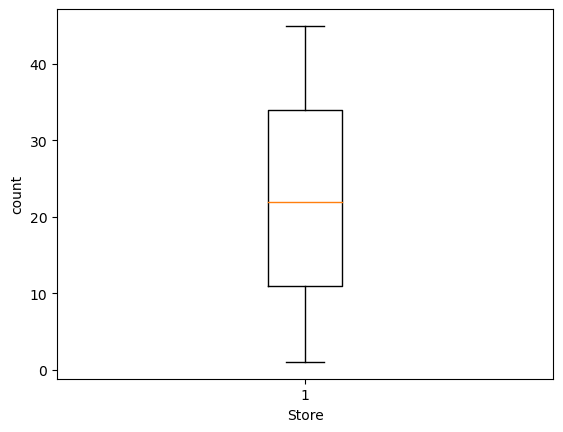

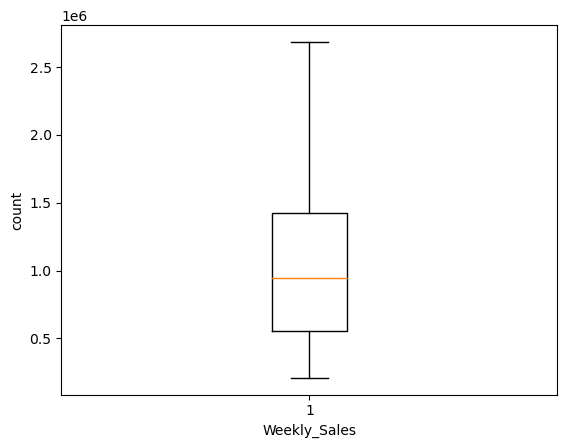

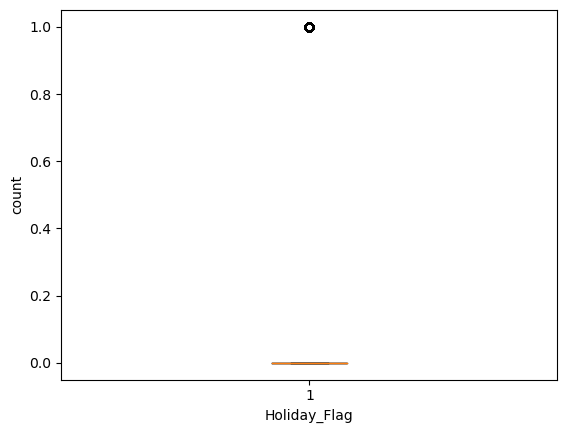

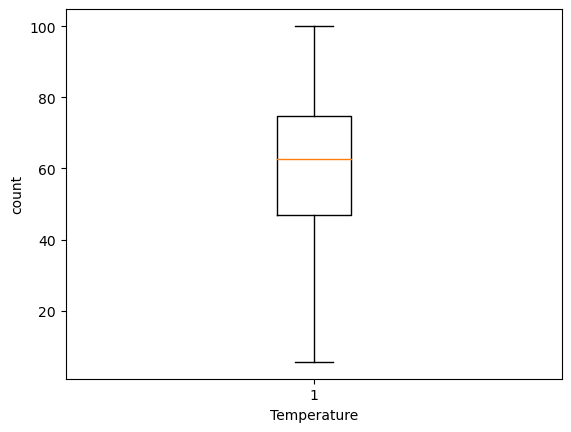

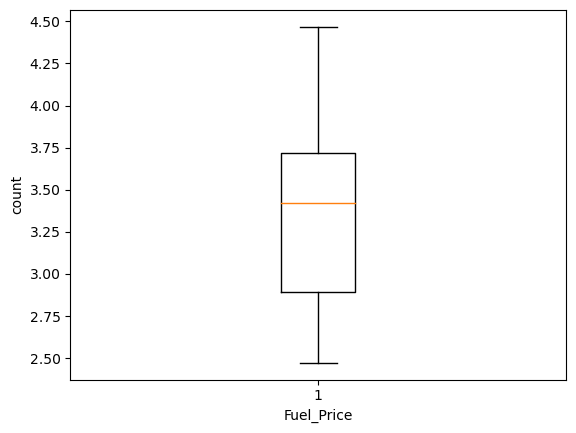

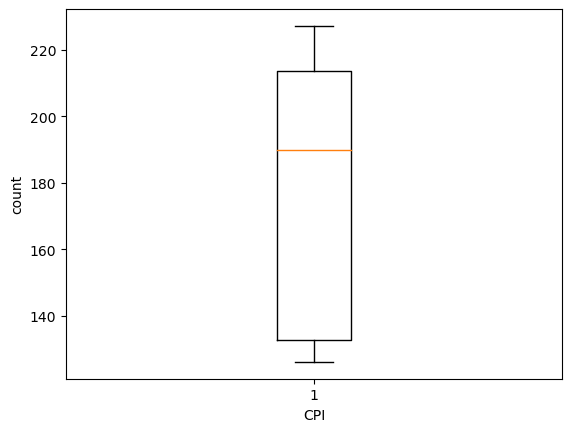

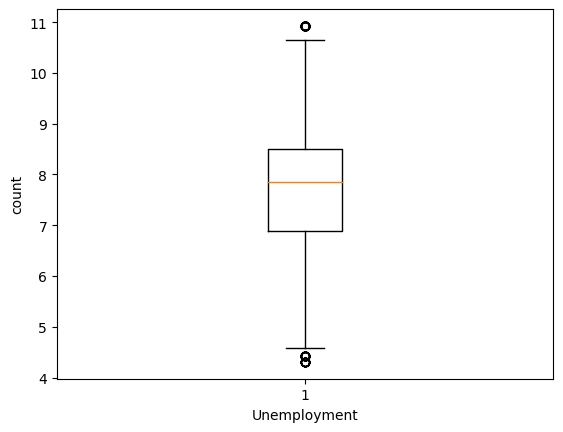

In [14]:
for col in col_names:
    if data[col].dtype!="object":
        plt.boxplot(data[col])
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

In [15]:
data.shape

(5919, 8)

Visualization

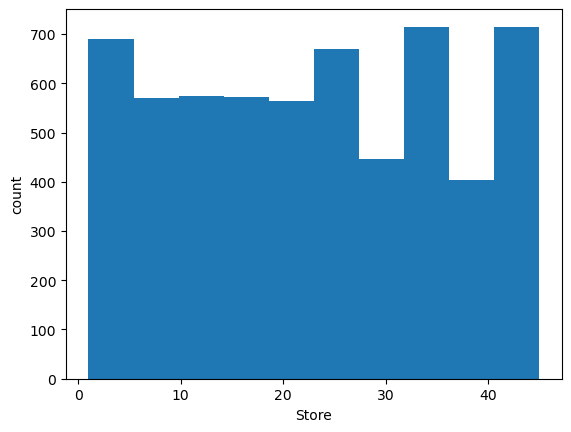

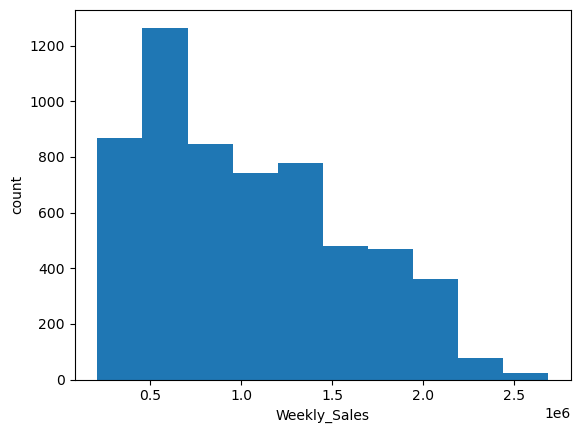

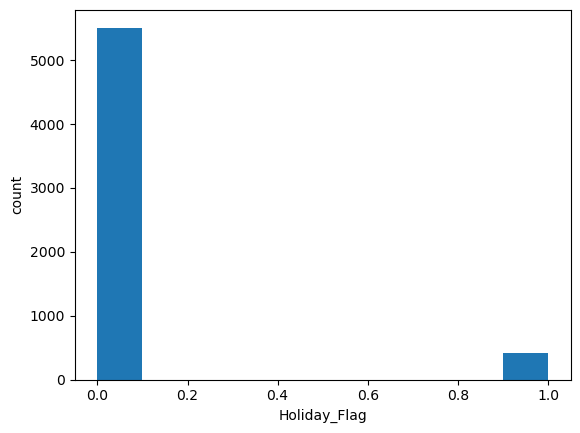

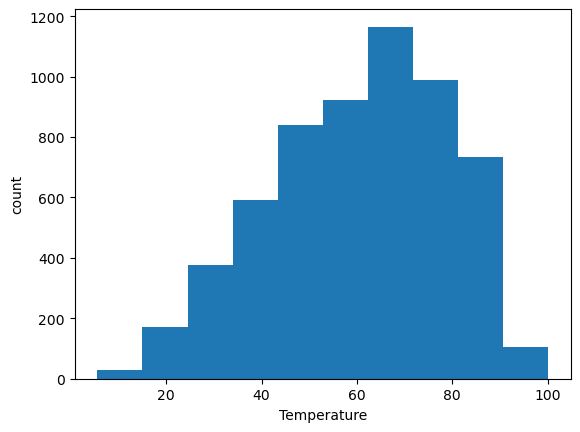

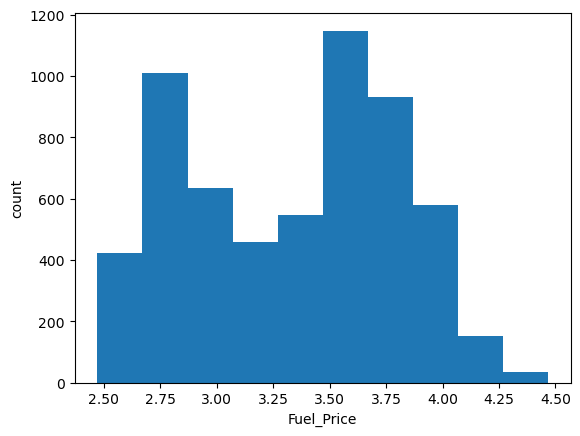

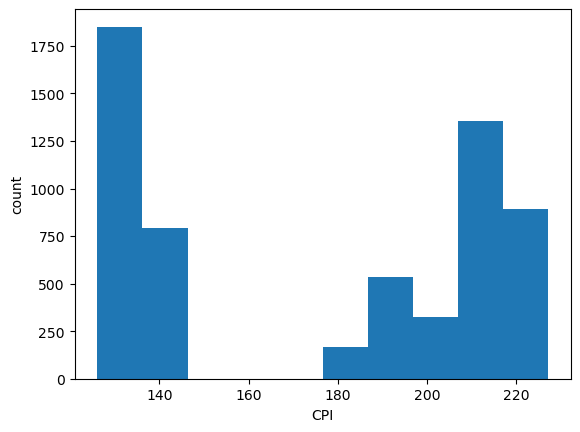

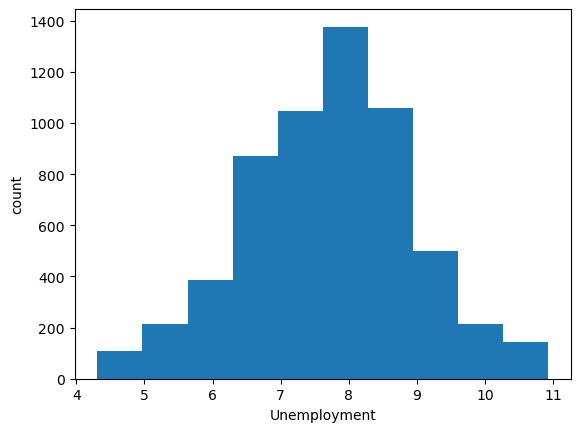

In [16]:
for col in col_names:
    if data[col].dtype!="object":
        plt.hist(data[col])
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

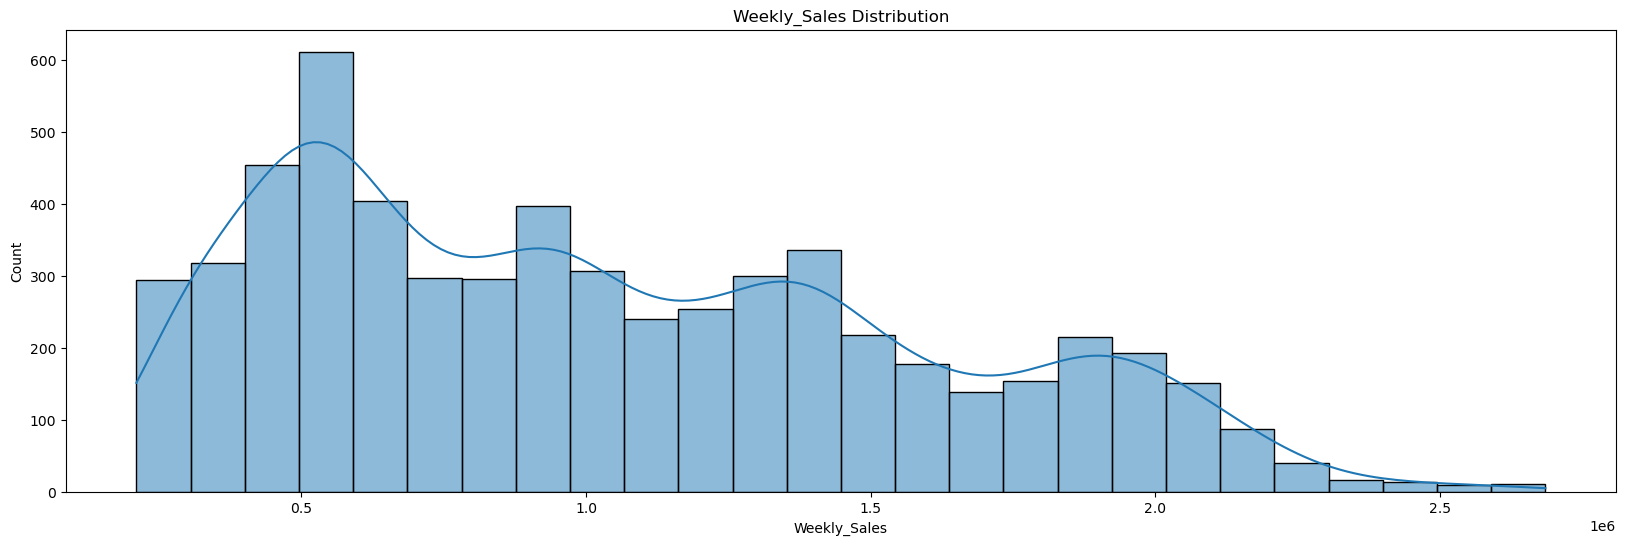

In [17]:
plt.figure(figsize=(20,6))
sns.histplot(x=data['Weekly_Sales'],kde=True);
plt.title('Weekly_Sales Distribution');

Weekly_Sales distribution is right skewed

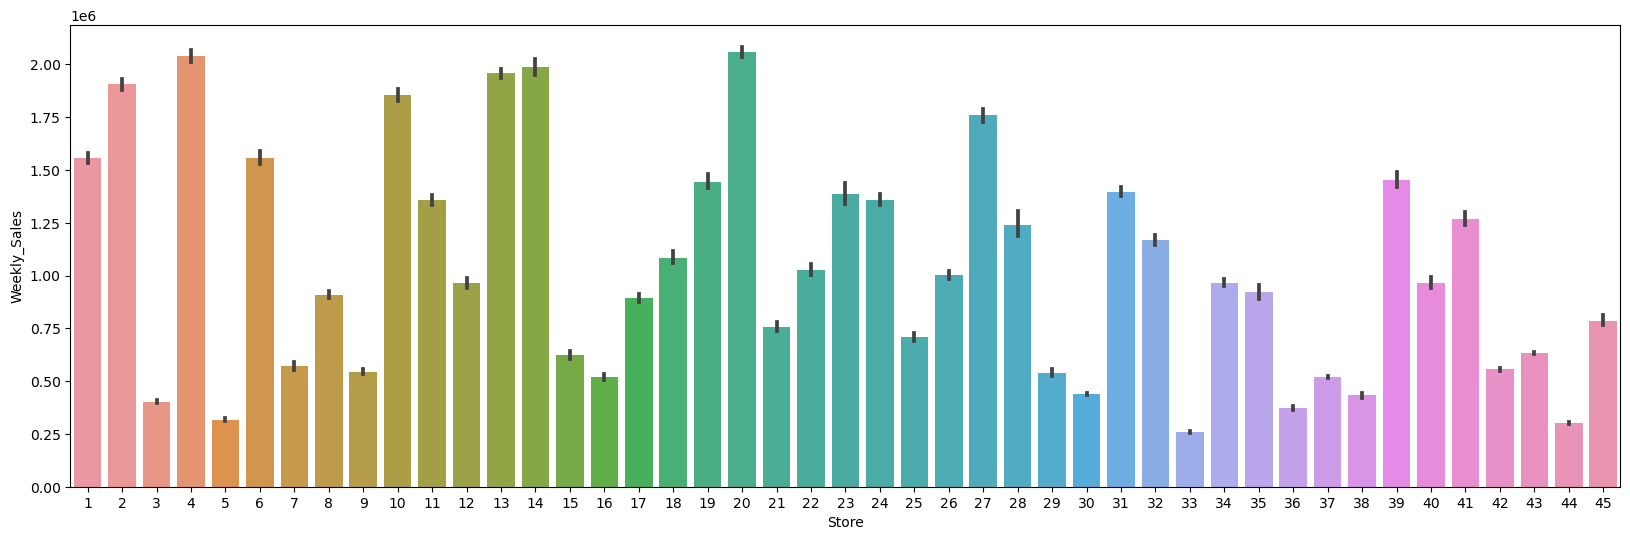

In [18]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=data)


In [19]:
data.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,-0.319365,0.004298,-0.026907,0.047579,-0.208538,0.309683
Weekly_Sales,-0.319365,1.000000,0.024404,-0.041461,0.019663,-0.082900,-0.073107
Holiday_Flag,0.004298,0.024404,1.000000,-0.156712,-0.076466,-0.000344,0.011055
Temperature,-0.026907,-0.041461,-0.156712,1.000000,0.145525,0.218625,0.024435
Fuel_Price,0.047579,0.019663,-0.076466,0.145525,1.000000,-0.144229,-0.105091
CPI,-0.208538,-0.082900,-0.000344,0.218625,-0.144229,1.000000,-0.218846
Unemployment,0.309683,-0.073107,0.011055,0.024435,-0.105091,-0.218846,1.000000


<AxesSubplot:>

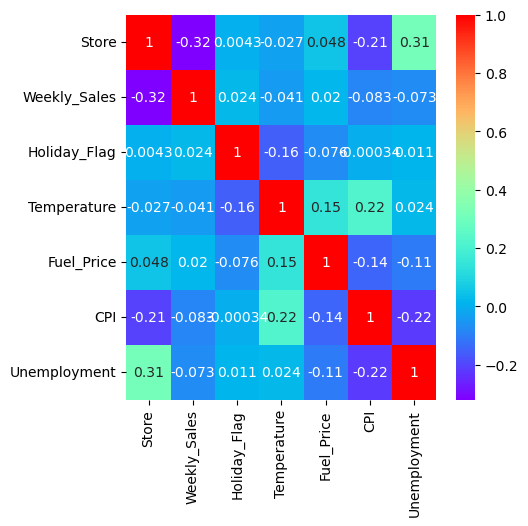

In [20]:
fig=plt.figure(figsize=(5,5))
sns.heatmap(data.corr(),annot=True,cmap="rainbow")

 If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [21]:
correlation = data['Unemployment'].corr(data['Weekly_Sales'])
print(f'Correlation coefficient: {correlation}')

Correlation coefficient: -0.0731068707888924


Here correlation coefficient is -0.073 indicates a very weak negative relationship between Unemployment rate and Weekly sales. The closer the correlation coefficient is to -1, the stronger the negative correlation but in this case, the relation is very minimal.

In [22]:
store_stats = data.groupby('Store').agg({'Weekly_Sales': 'mean','Unemployment':'mean'})
print(store_stats)

       Weekly_Sales  Unemployment
Store                            
1      1.555264e+06      7.610420
2      1.905830e+06      7.621319
3      4.027044e+05      7.176986
4      2.038739e+06      6.230200
5      3.180118e+05      6.295406
6      1.556539e+06      6.604085
7      5.707060e+05      8.584099
8      9.087495e+05      6.091846
9      5.439806e+05      6.099881
10     1.852745e+06      8.356138
11     1.356383e+06      7.176986
12     9.639242e+05     10.754941
13     1.957682e+06      6.997810
14     1.986529e+06      8.648029
15     6.233125e+05      7.996252
16     5.192477e+05      6.477993
17     8.935814e+05      6.549406
18     1.084718e+06      8.838301
19     1.444999e+06      7.996252
20     2.058998e+06      7.374485
21     7.560691e+05      7.623846
22     1.028501e+06      8.069371
23     1.386347e+06      5.059768
24     1.356755e+06      8.447014
25     7.067215e+05      7.371413
26     1.002912e+06      7.872070
27     1.759140e+06      8.002291
28     1.24157

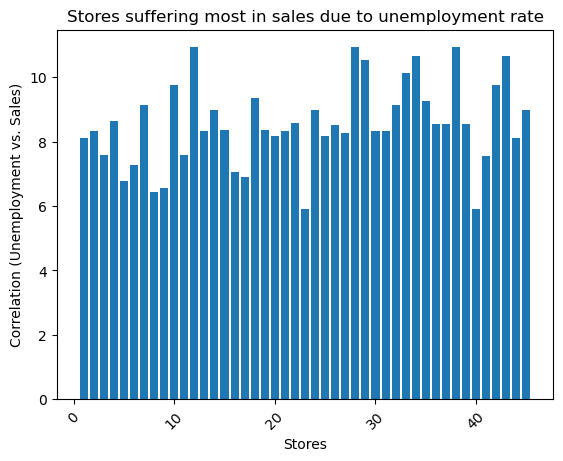

In [23]:
plt.bar(data['Store'], data['Unemployment'])
plt.xlabel('Stores')
plt.ylabel('Correlation (Unemployment vs. Sales)')
plt.title('Stores suffering most in sales due to unemployment rate')
plt.xticks(rotation=45)
plt.show()

 Does temperature affect the weekly sales in any manner?

In [24]:
correlation = data['Temperature'].corr(data['Weekly_Sales'])
print(f'Correlation coefficient: {correlation}')

Correlation coefficient: -0.04146056949039012


Here correlation coefficient is -0.041 indicates a very weak negative relationship between temperature and Weekly sales.

 How is the Consumer Price index affecting the weekly sales of various stores?

In [25]:
store_stats = data.groupby('Store').agg({'Weekly_Sales': 'mean','CPI':'mean'})
print(store_stats)

       Weekly_Sales         CPI
Store                          
1      1.555264e+06  215.996892
2      1.905830e+06  215.655023
3      4.027044e+05  219.391531
4      2.038739e+06  128.380156
5      3.180118e+05  216.565581
6      1.556539e+06  217.585850
7      5.707060e+05  193.677635
8      9.087495e+05  219.439026
9      5.439806e+05  219.626689
10     1.852745e+06  128.701735
11     1.356383e+06  219.391531
12     9.639242e+05  130.901331
13     1.957682e+06  128.693003
14     1.986529e+06  186.345873
15     6.233125e+05  135.092607
16     5.192477e+05  193.664243
17     8.935814e+05  128.679669
18     1.084718e+06  135.092607
19     1.444999e+06  135.092607
20     2.058998e+06  209.101591
21     7.560691e+05  215.646311
22     1.028501e+06  139.011284
23     1.386347e+06  133.869236
24     1.356755e+06  135.092607
25     7.067215e+05  209.038131
26     1.002912e+06  135.092607
27     1.759140e+06  139.017642
28     1.241575e+06  130.901331
29     5.394514e+05  135.092607
30     4

Top performing stores according to the historical data.

In [26]:
store_sales = data.groupby('Store')['Weekly_Sales'].sum().reset_index()
store_sales = store_sales.sort_values(by= 'Weekly_Sales',ascending=False)

In [27]:
top_performing_stores = store_sales.head(10)
print(top_performing_stores)

    Store  Weekly_Sales
19     20  2.800237e+08
13     14  2.761276e+08
1       2  2.687221e+08
12     13  2.682025e+08
9      10  2.556789e+08
26     27  2.480387e+08
3       4  2.446487e+08
0       1  2.224028e+08
5       6  2.210286e+08
38     39  2.074455e+08


The worst performing store, and how significant is the difference between the
highest and lowest performing stores.

In [28]:
highest_sales = store_sales['Weekly_Sales'].max()
lowest_sales = store_sales['Weekly_Sales'].min()

difference = highest_sales - lowest_sales
print(f'Difference between and lowest performing stores: {difference}')

Difference between and lowest performing stores: 272676355.92


Using predictive modeling techniques to forecast the sales for each store for the next 12
weeks.

In [29]:
data['Date'] = pd.to_datetime(data['Date'])

In [30]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

In [31]:
del data['Date']

In [32]:
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [34]:
x = data.drop(['Weekly_Sales'],axis=1)
y = data['Weekly_Sales']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5919 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5919 non-null   int64  
 1   Weekly_Sales  5919 non-null   float64
 2   Holiday_Flag  5919 non-null   int64  
 3   Temperature   5919 non-null   float64
 4   Fuel_Price    5919 non-null   float64
 5   CPI           5919 non-null   float64
 6   Unemployment  5919 non-null   float64
 7   year          5919 non-null   int64  
 8   month         5919 non-null   int64  
 9   day           5919 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 508.7 KB


## Linear Regression

In [38]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
y_predict = lr.predict(X_test)

In [40]:
mse = mean_squared_error(y_test,y_predict)

In [41]:
rmse = np.sqrt(mse)

In [42]:
print('MSE',mse)
print('RMSE',rmse)

MSE 266169988358.63428
RMSE 515916.6486542514


In [43]:
r2_score(y_test,y_predict)

0.13419542812179575

## DecisionTreeRegressor

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
tree_reg = DecisionTreeRegressor(max_depth=3)

In [46]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [47]:
y_predict = tree_reg.predict(X_test)

In [48]:
mse = mean_squared_error(y_test, y_predict)
print("Mean squared error: ", mse)

Mean squared error:  184449280710.79535


In [49]:
print(r2_score(y_test,y_predict))

0.4000186440859027


## RandomForestRegressor

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
rf_reg= RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [52]:
y_pred = rf_reg.predict(X_test)

In [53]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("RMSE: ", rmse)
print("R2 score: ", r2)

RMSE:  124805.81584956213
R2 score:  0.94933238797971


In [54]:
y_pred

array([ 291959.7974, 2004925.4928, 1394303.1563, ...,  466776.453 ,
        791830.3635,  697512.0032])

## Time Series Model

In [55]:
data1 = pd.read_csv('Walmart DataSet.csv')

In [56]:
data1['Date'] = pd.to_datetime(data1['Date'])

In [57]:
data1.set_index('Date', inplace=True) 

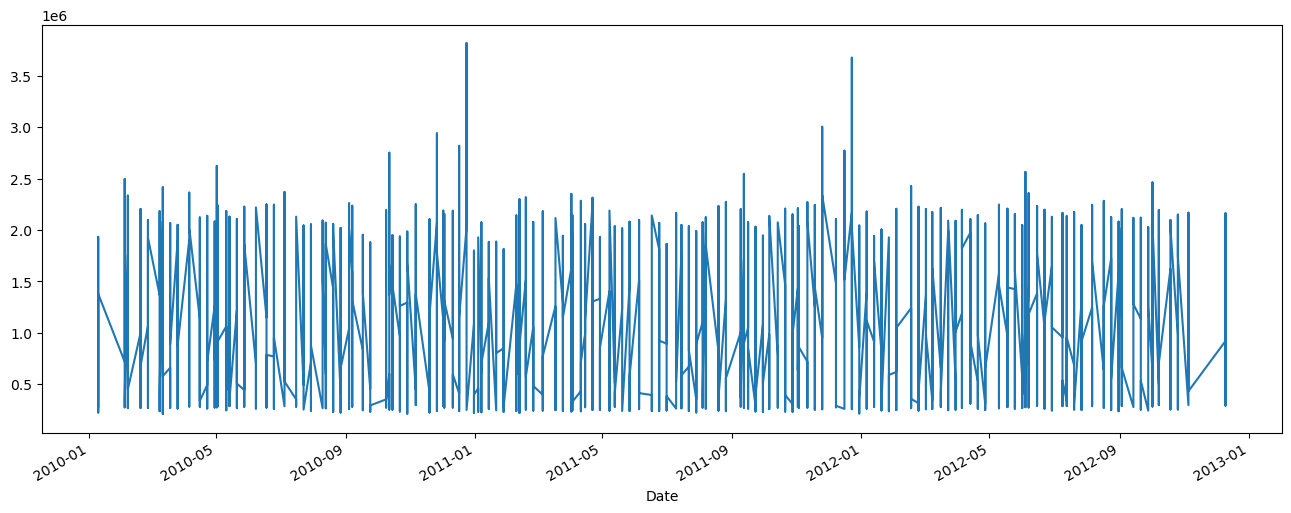

In [58]:
plt.figure(figsize=(16,6))
data1['Weekly_Sales'].plot()
plt.show()

In [59]:
df_week = data1.resample('W').mean()

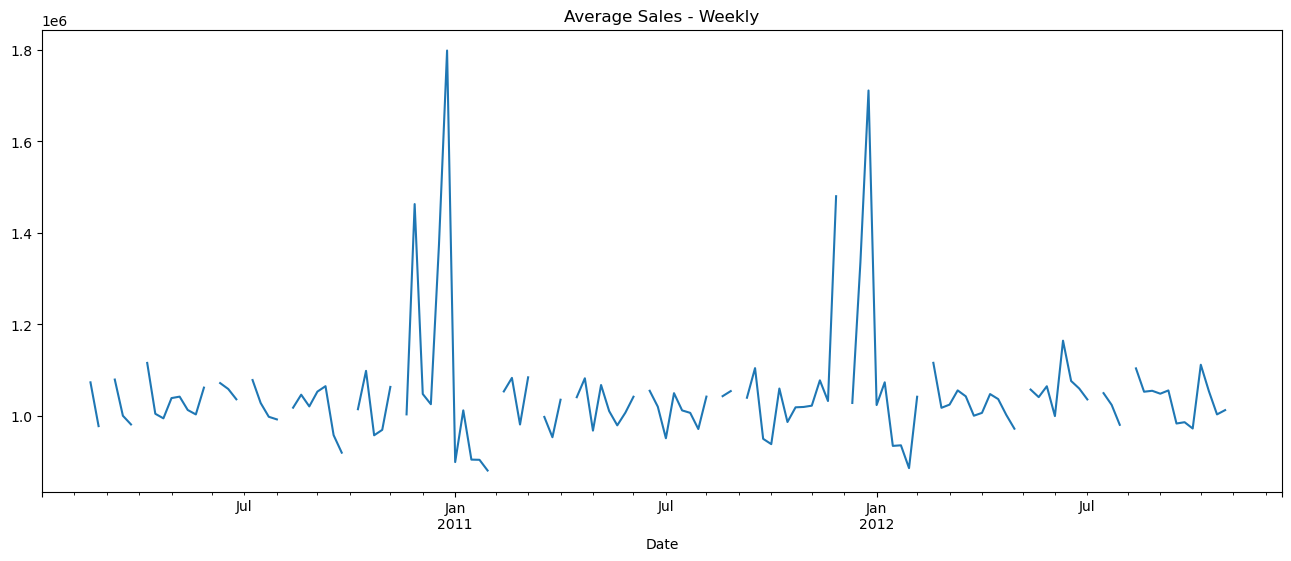

In [60]:
plt.figure(figsize=(16,6))
df_week['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

In [61]:
df_month= data1.resample('MS').mean()

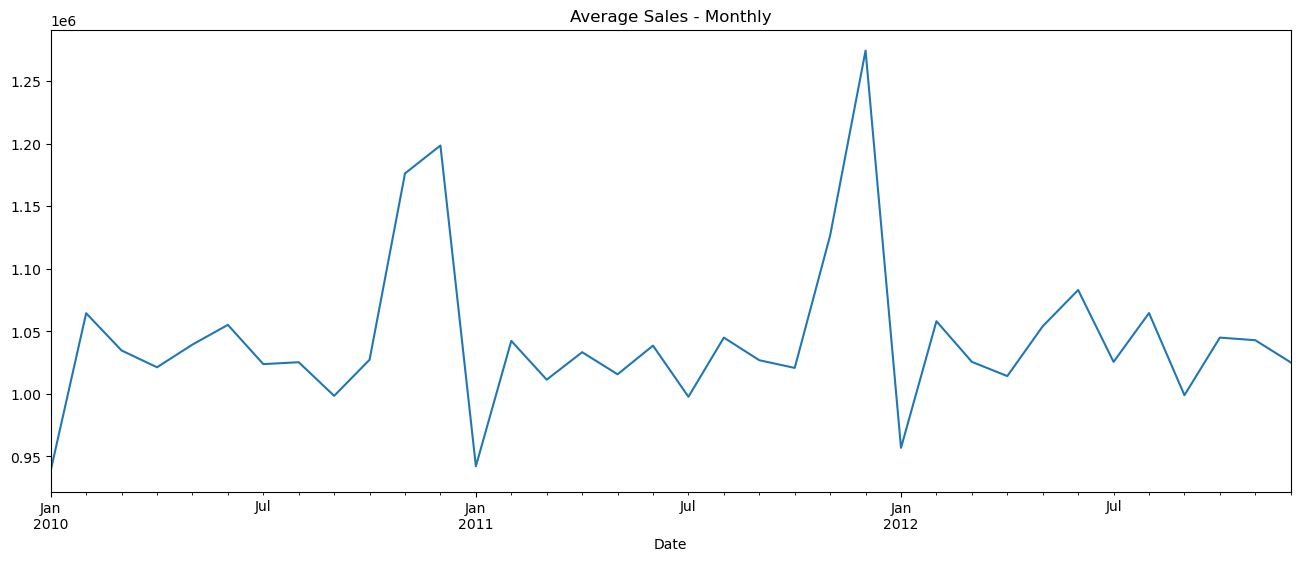

In [62]:
plt.figure(figsize=(16,6))
df_month['Weekly_Sales'].plot()
plt.title('Average Sales - Monthly')
plt.show()

In [63]:
roll_mean = df_week['Weekly_Sales'].rolling(window=2, center=False).mean()
roll_std = df_week['Weekly_Sales'].rolling(window=2, center=False).std()

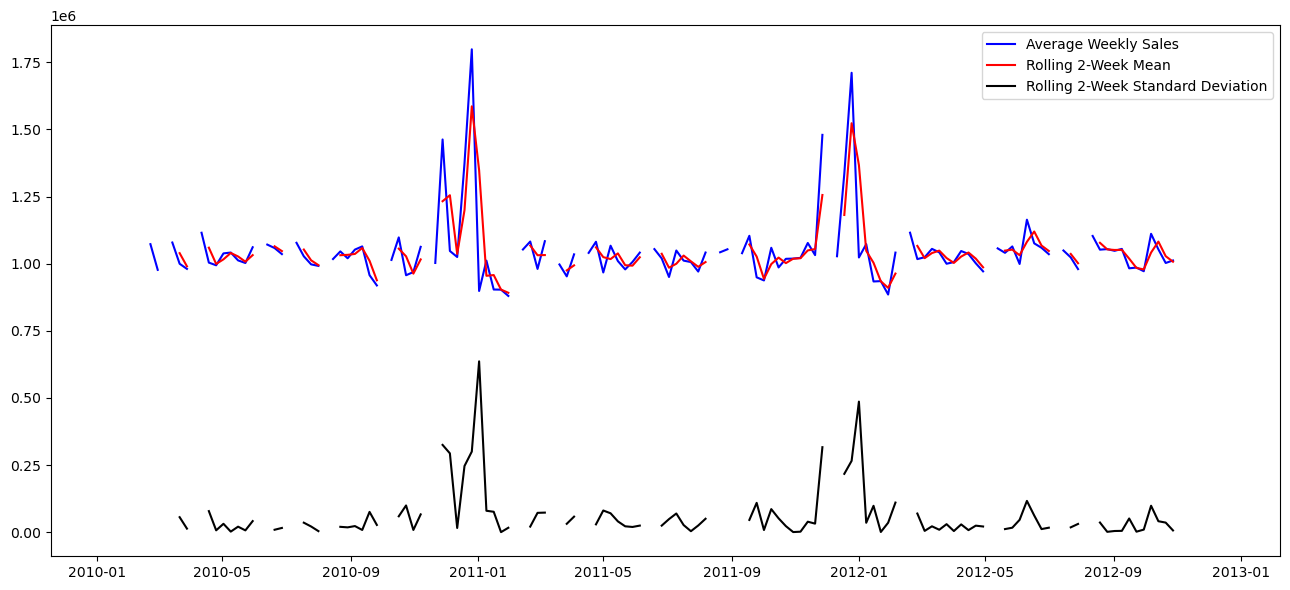

In [64]:
fig,ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week['Weekly_Sales'], color='blue',label='Average Weekly Sales')
ax.plot(roll_mean, color='red', label='Rolling 2-Week Mean')
ax.plot(roll_std, color='black', label='Rolling 2-Week Standard Deviation')
ax.legend()
fig.tight_layout()

In [65]:
train_data = df_week[:int(0.7*(len(df_week)))] 
test_data = df_week[int(0.7*(len(df_week))):]


In [66]:
target= "Weekly_Sales"
used_cols = [c for c in df_week.columns.to_list() if c not in [target]]

In [67]:
X_train= train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

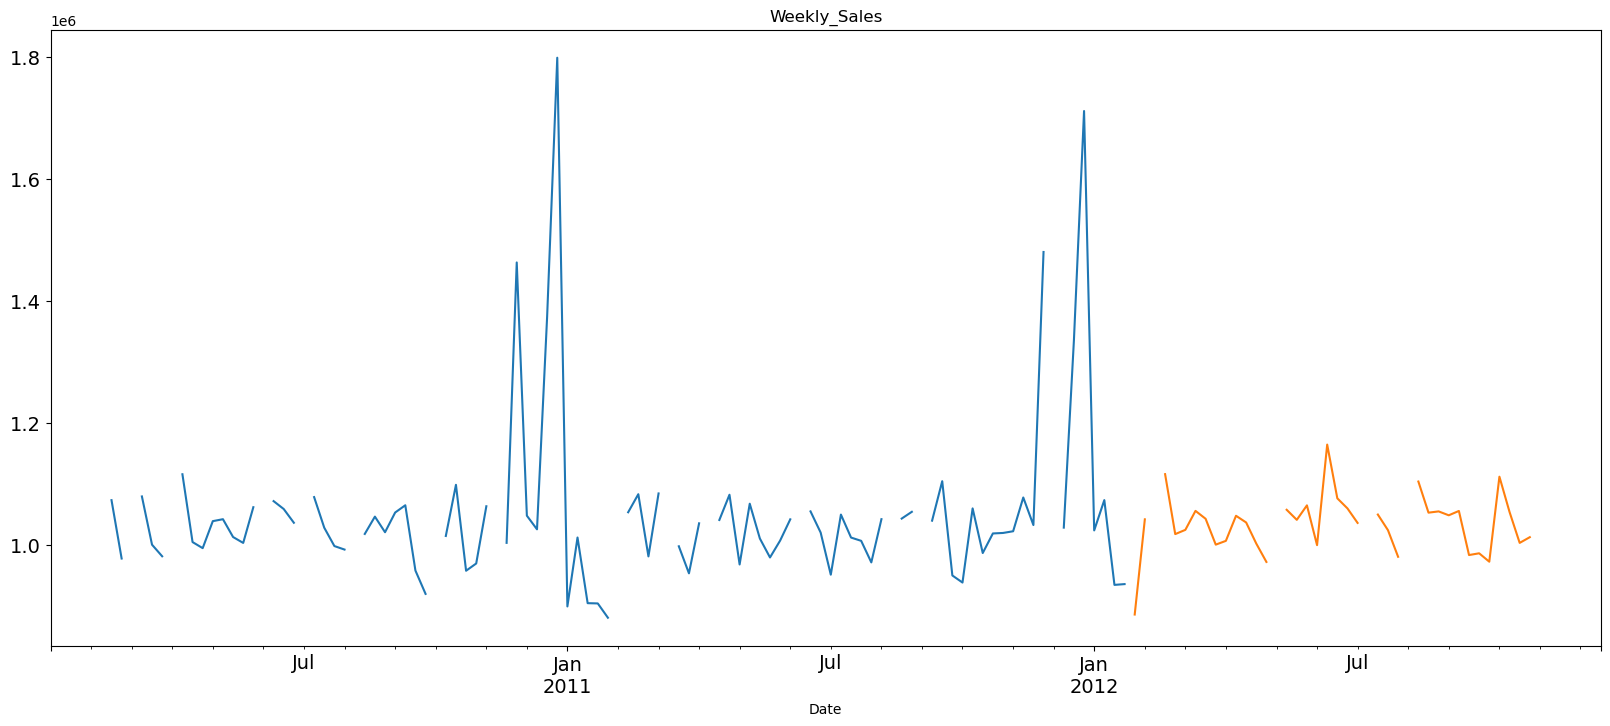

In [68]:
train_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

In [69]:
decomposed = decompose(df_week['Weekly_Sales'].values, 'additive', m=20)

In [70]:
df_week_diff= df_week['Weekly_Sales'].diff().dropna()

In [71]:
diff_roll_mean = df_week_diff.rolling(window=2, center=False).mean()
diff_roll_std = df_week_diff.rolling(window=2, center=False).std()

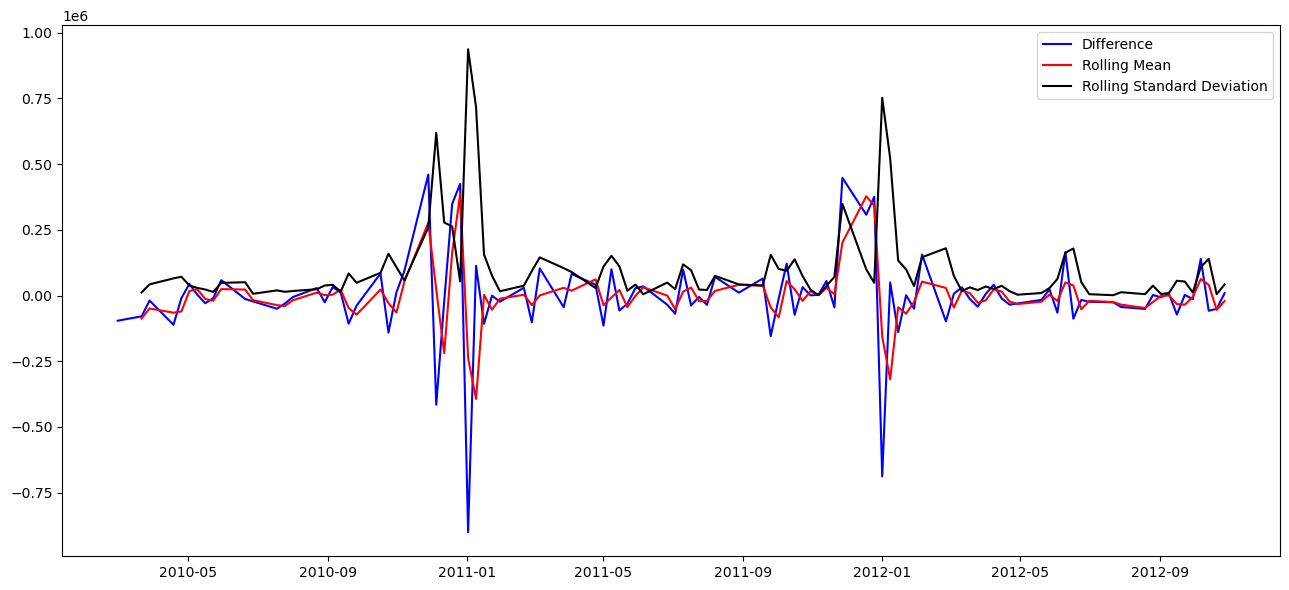

In [72]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_diff, color='blue',label='Difference')
ax.plot(diff_roll_mean, color='red', label='Rolling Mean')
ax.plot(diff_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

In [73]:
train_data_diff = df_week_diff [:int(0.7*(len(df_week_diff )))]
test_data_diff = df_week_diff [int(0.7*(len(df_week_diff ))):]

In [74]:
model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_diff)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=1960.885, Time=2.35 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=1956.315, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=1956.793, Time=0.09 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=1958.363, Time=0.11 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=1958.929, Time=0.10 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=1955.354, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=1958.803, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=1954.821, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=1954.127, Time=0.14 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=1955.938, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=1958.490, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=1956.792, Time=0.13 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=1957.518, Time=0.13 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=1953.934, Time=0.26 sec
 ARIMA(3,0,0)(0

ARIMA(maxiter=200, order=(2, 0, 3), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

In [75]:
y_pred = model_auto_arima.predict(n_periods=len(test_data_diff))
y_pred = pd.DataFrame(y_pred,index = test_data.index,columns=['Prediction'])

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


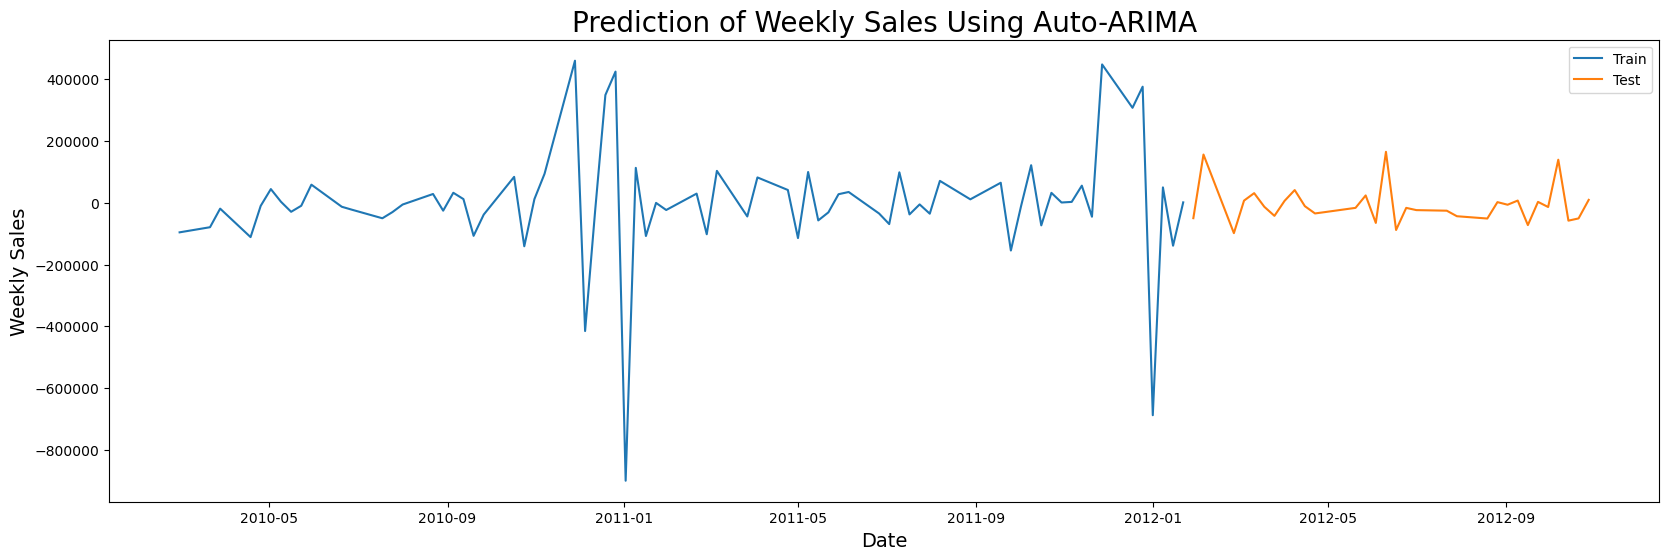

In [76]:
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()
